# Predicting House prices Using Multiple Linear Regression (MLR) 

#### Jalnar Alshehri

### Problem Statement
The real estate market is very dynamic, with house prices influenced by a variety of factors, such as location, market conditions, and property features. Accurately predicting house prices can be a difficult task due to the complexity and diversity of these factors. Traditional valuation methods may not take into account all the nuances of the market, resulting in inaccurate estimates.
Machine learning models should therefore be used to predict more accurately.


## Importing liberaries

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import scipy
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

## Load dataset 

In [4]:
# Load 
file_path = r'C:\Users\jalna\Downloads\kc_house_data.csv\kc_house_data.csv'
dataset = pd.read_csv(file_path)

# Transform the dataset to pandas dataframe
df = pd.DataFrame(dataset)

# Display the first 10 rows of the dataset
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Featrues :
* ID - Unique ID for each home sold
* date- Date of the home sale
* price - Price of each home sold
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* sqft_living15 - The square footage of interior housing living space in 2015 / for nearst 15 neighbor 
* sqft_lot15 - The square footage of the land lots in 2015 / for nearst 15 neighbor
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* lat - Lattitude
* long - Longitude
* zipcode - What zipcode area the house 

In [7]:
# Renaming columns
df = df.rename(columns={'sqft_living': 'living_space','sqft_lot': 'land_space','sqft_above': 'space_above_ground',
    'sqft_basement': 'basement_space','sqft_living15': 'living_space_15','sqft_lot15': 'land_space_15'})
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'living_space',
       'land_space', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'space_above_ground', 'basement_space', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'living_space_15', 'land_space_15'],
      dtype='object')

# Exploratory Data Analysis


In [10]:
# Data type and the shape (number of record and columns)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21613 non-null  int64  
 1   date                21613 non-null  object 
 2   price               21613 non-null  float64
 3   bedrooms            21613 non-null  int64  
 4   bathrooms           21613 non-null  float64
 5   living_space        21613 non-null  int64  
 6   land_space          21613 non-null  int64  
 7   floors              21613 non-null  float64
 8   waterfront          21613 non-null  int64  
 9   view                21613 non-null  int64  
 10  condition           21613 non-null  int64  
 11  grade               21613 non-null  int64  
 12  space_above_ground  21613 non-null  int64  
 13  basement_space      21613 non-null  int64  
 14  yr_built            21613 non-null  int64  
 15  yr_renovated        21613 non-null  int64  
 16  zipc

(21613, 21)

In [12]:
# Convert 'bathrooms' from float to int
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

# Convert 'date' from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21613 non-null  int64         
 1   date                21613 non-null  datetime64[ns]
 2   price               21613 non-null  float64       
 3   bedrooms            21613 non-null  int64         
 4   bathrooms           21613 non-null  int32         
 5   living_space        21613 non-null  int64         
 6   land_space          21613 non-null  int64         
 7   floors              21613 non-null  int32         
 8   waterfront          21613 non-null  int64         
 9   view                21613 non-null  int64         
 10  condition           21613 non-null  int64         
 11  grade               21613 non-null  int64         
 12  space_above_ground  21613 non-null  int64         
 13  basement_space      21613 non-null  int64     

In [14]:
# drop 'id' 
df = df.drop(columns=['id'])

### Checking for missing values and duplicates 

In [17]:
df.isnull().sum()

date                  0
price                 0
bedrooms              0
bathrooms             0
living_space          0
land_space            0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
space_above_ground    0
basement_space        0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_space_15       0
land_space_15         0
dtype: int64

In [19]:
# if there is duplicated print (True) if not (False)
if df.duplicated().any():  
    print(True)
else:
    print(False)

False


## Descriptive Statistics

In [22]:
# Statistical Summary (central tendence , spread )

print("Statistical Summary:",'\n') 
numeric_df = df.select_dtypes(include=['number'])  # Only numeric columns
display(numeric_df.describe())

# Display the median 
print("\nMedian:\n")
display(numeric_df.median())

Statistical Summary: 



,price,bedrooms,bathrooms,living_space,land_space,floors,waterfront,view,condition,grade,space_above_ground,basement_space,yr_built,yr_renovated,zipcode,lat,long,living_space_15,land_space_15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



Median:



price                 450000.0000
bedrooms                   3.0000
bathrooms                  2.0000
living_space            1910.0000
land_space              7618.0000
floors                     1.0000
waterfront                 0.0000
view                       0.0000
condition                  3.0000
grade                      7.0000
space_above_ground      1560.0000
basement_space             0.0000
yr_built                1975.0000
yr_renovated               0.0000
zipcode                98065.0000
lat                       47.5718
long                    -122.2300
living_space_15         1840.0000
land_space_15           7620.0000
dtype: float64

In [24]:
display(df.bedrooms.value_counts())
display(df.bathrooms.value_counts())

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

bathrooms
2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: count, dtype: int64

In [26]:
# Calculate the median of 'bedrooms' and 'bathrooms' excluding 0 values
bedrooms_median = df[df['bedrooms'] != 0]['bedrooms'].median()
bathrooms_median = df[df['bathrooms'] != 0]['bathrooms'].median()

# Replace 0 values in 'bedrooms' and 'bathrooms' with the respective median
df['bedrooms'] = df['bedrooms'].replace(0, bedrooms_median)
df['bathrooms'] = df['bathrooms'].replace(0, bathrooms_median)

# Check the updated DataFrame
display(df.bathrooms.value_counts())
display(df.bedrooms.value_counts())

bathrooms
2    10628
1     8355
3     2228
4      338
5       48
6       12
8        2
7        2
Name: count, dtype: int64

bedrooms
3     9837
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

### Checking distribution of dependent Feature (target) 

In [29]:
# function to show the distbucion by histogram , Q-Q plot and print the skweness 
def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target, color= '#021841ff',norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    #ax3 = fig.add_subplot(grid[:,2])
    print(f'skweness is { target.skew()}')
    plt.show()

skweness is 4.024069144684712


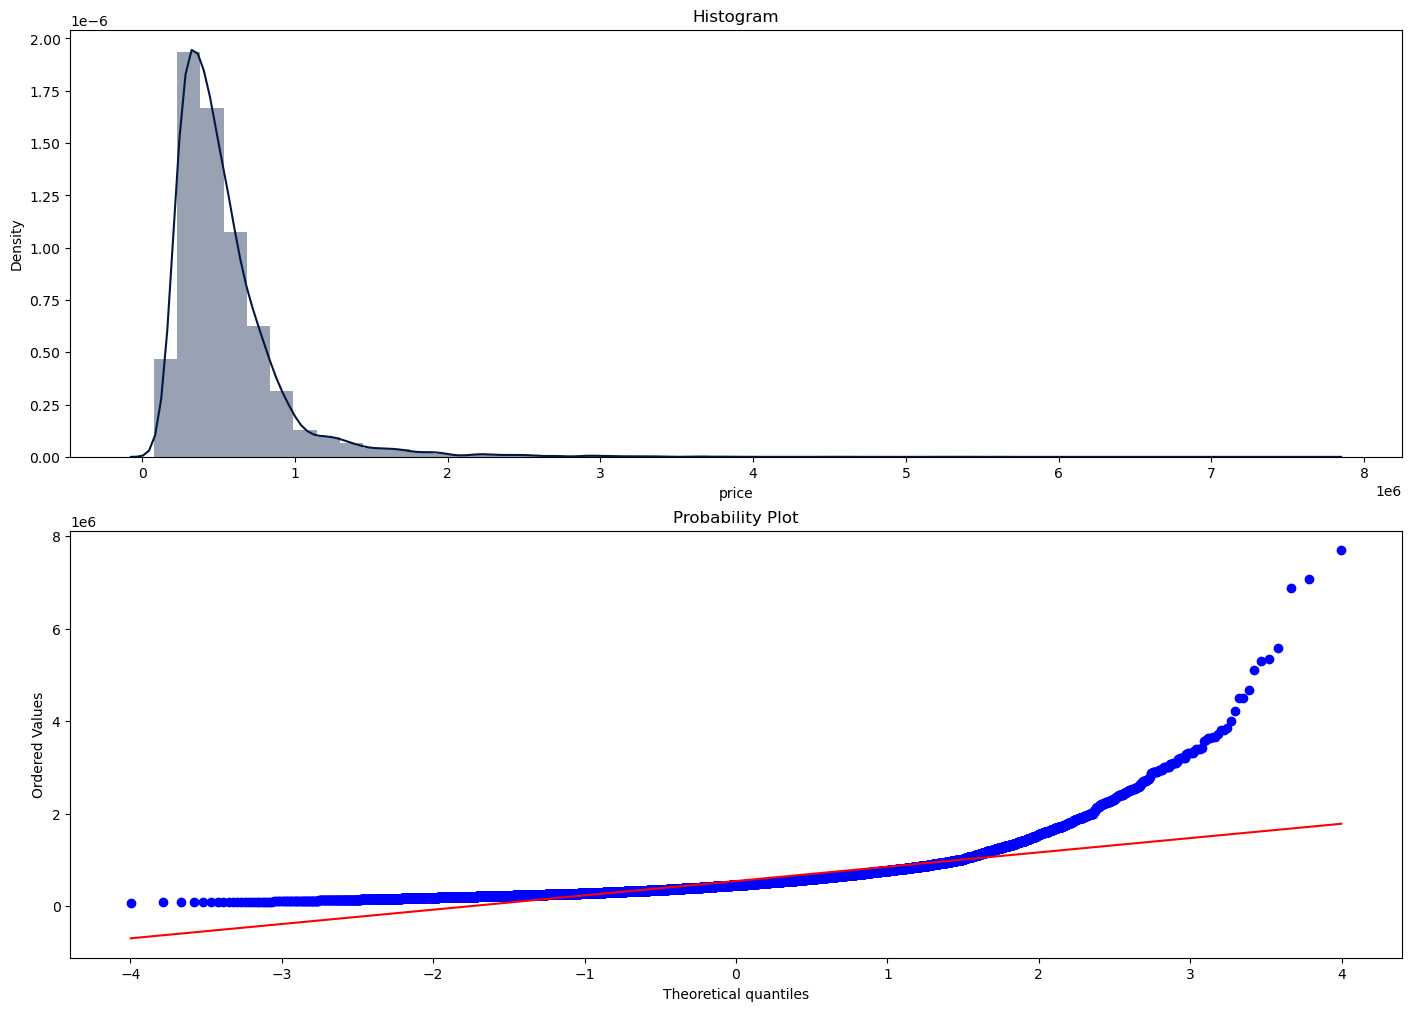

In [31]:
target_analysis(df['price'])

skweness is 0.4280765149574905


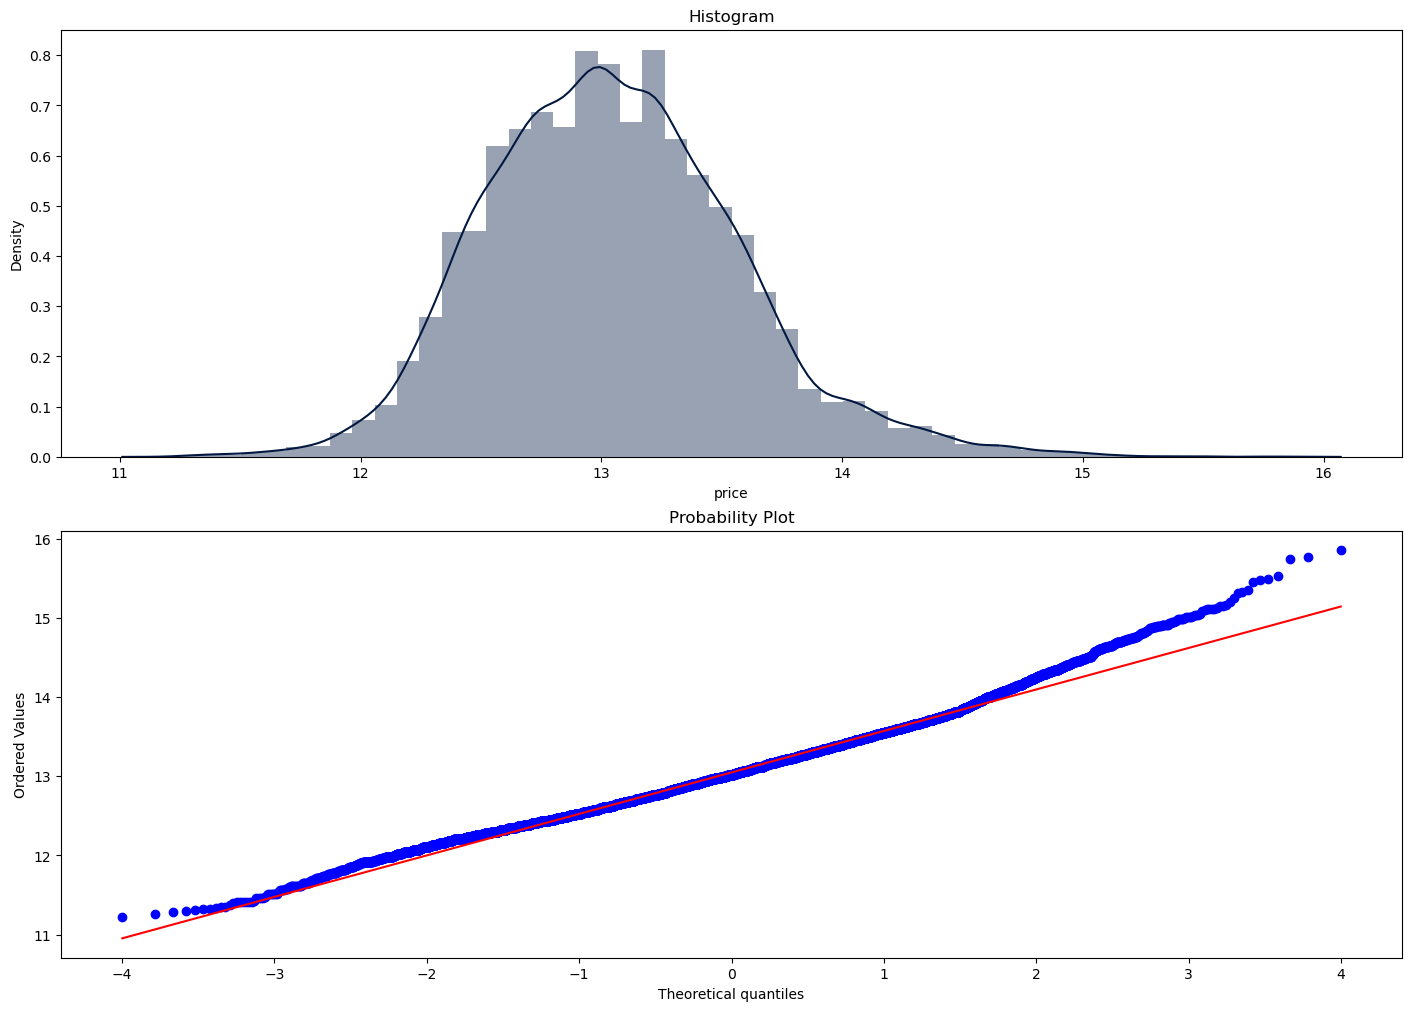

In [32]:
# transforming price using Log 
target_analysis(np.log1p(df['price']))

In [39]:
# save the transforming in new column 'log_price'
df['log_price'] = np.log1p(df['price'])

### Checking distribution of independent Features

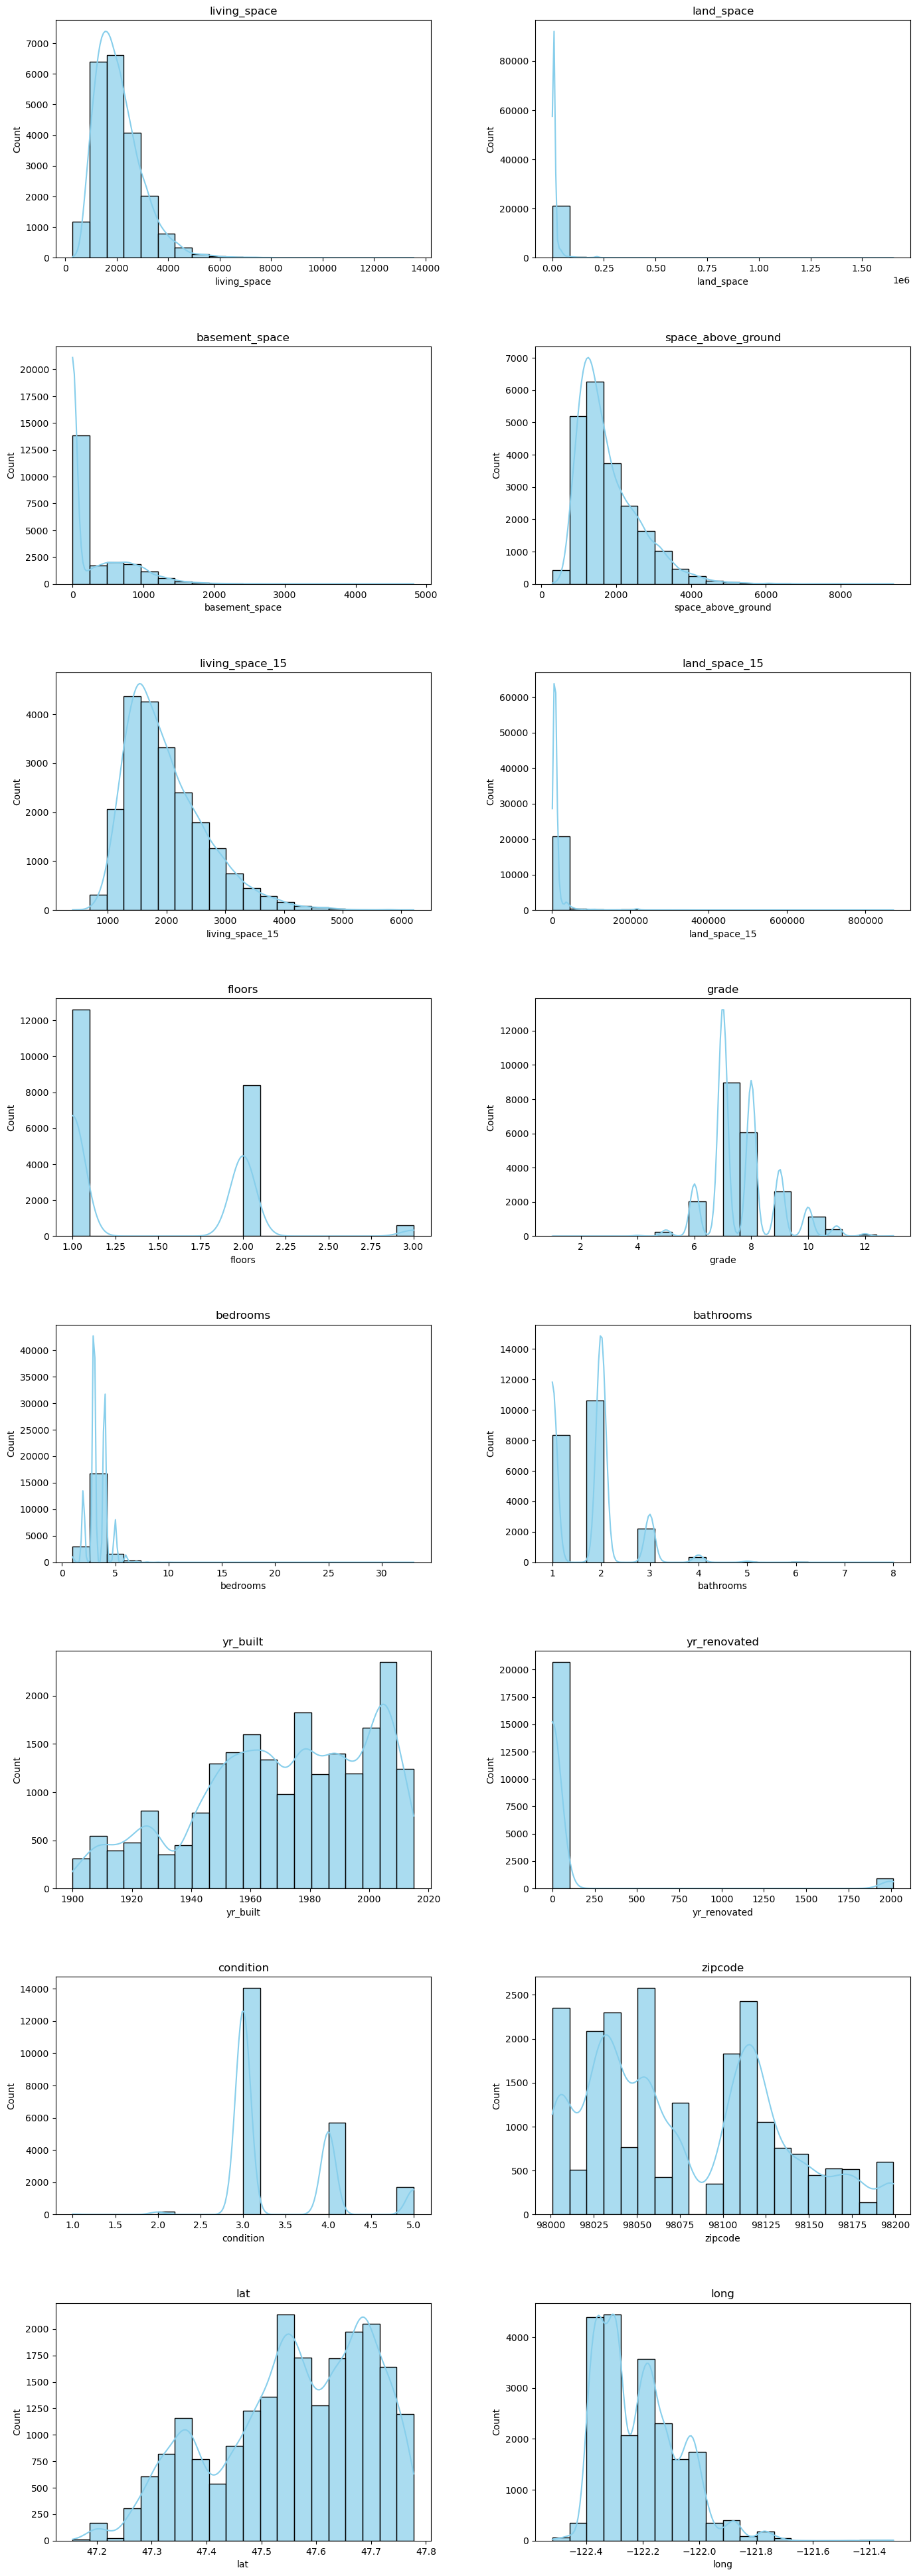

In [42]:
# Dataframe with specific features
df1 = df[['living_space', 'land_space', 'basement_space', 'space_above_ground', 'living_space_15',
          'land_space_15', 'floors', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated',
          'condition', 'log_price', 'zipcode','lat','long']]

# Excluding 'log_price'
multicoll_pairs = df1.drop(columns=['log_price']).columns.to_list()

# Create subplots for histograms (two per row)
# Ensure there are enough rows to accommodate all features
num_rows = (len(multicoll_pairs) + 1) // 2  # If odd, add an extra row
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# If there is an odd number of features, axes[-1, 1] will be empty, so remove it
if len(multicoll_pairs) % 2 != 0:
    axes = axes[:-1]

def plot_histogram(feat, i, j):
    # Plot histogram
    sns.histplot(df1[feat], ax=axes[i, j], kde=True, bins=20, color='skyblue', alpha=0.7)
    axes[i, j].set_title(f"{feat}")
    # Adjust layout
    fig.tight_layout(pad=5.0)

# Looping over all features to plot histograms in pairs
for i, feat in enumerate(multicoll_pairs):
    row = i // 2  # Determine row index (integer division by 2)
    col = i % 2   # Determine column index (modulus operation)
    plot_histogram(feat, row, col)

# Show the plot
plt.show()

### Checking Linearity of independent features

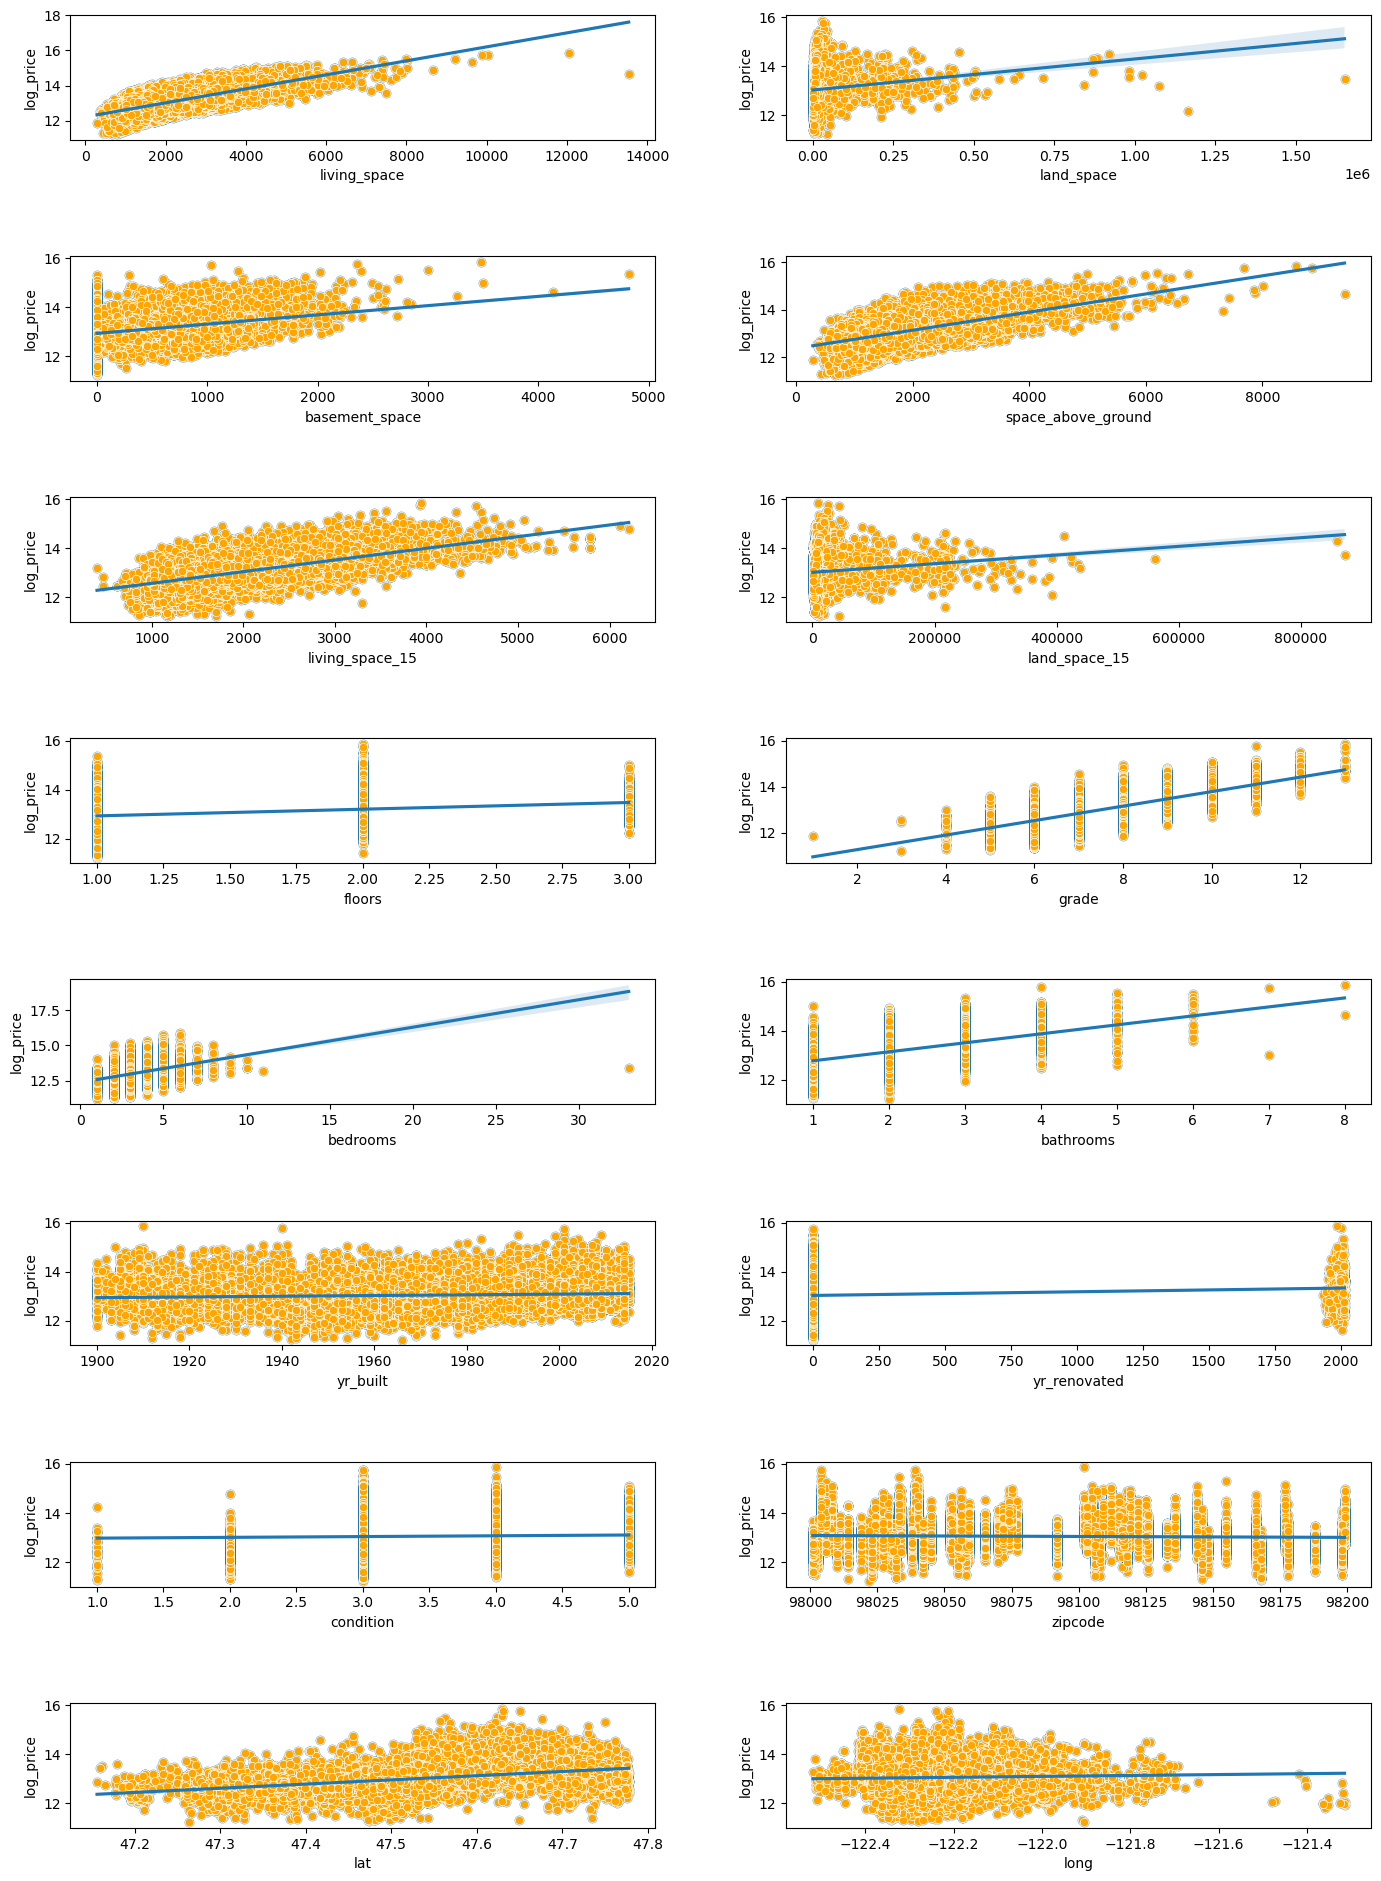

In [49]:
#  the list of feature excluding 'log_price' from df1
multicoll_pairs = df1.drop(columns=['log_price']).columns.to_list()
# create figure
fig,axes = plt.subplots(8,2,figsize=(15,20))

def plot_two(feat,i,j):
    sns.regplot(x=df1[feat], y=df1['log_price'], ax=axes[i,j])
    sns.scatterplot(y=df1['log_price'],x=df1[feat],color=('orange'),ax=axes[i,j])   
    fig.tight_layout(pad=5.0)
    
# loop through each feature 
for i,feat in enumerate(multicoll_pairs):
    j = i%2 
    plot_two(feat,i//2,j) # for every two features the row index will increments

### Remove Outliers 

In [856]:
df['bedrooms'].describe()

count    21613.000000
mean         3.372646
std          0.926423
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [857]:
# select rows where the 'bedrooms' has a value of 33
df[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,living_space,land_space,floors,waterfront,view,condition,...,space_above_ground,basement_space,yr_built,yr_renovated,zipcode,lat,long,living_space_15,land_space_15,log_price
15870,2014-06-25,640000.0,33,1,1620,6000,1,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,13.369225


In [858]:
df_bed = df[df['bedrooms'] == 3]
df_bed.head(5)

,date,price,bedrooms,bathrooms,living_space,land_space,floors,waterfront,view,condition,...,space_above_ground,basement_space,yr_built,yr_renovated,zipcode,lat,long,living_space_15,land_space_15,log_price
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195616
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168
6,2014-06-27,257500.0,3,2,1715,6819,2,0,0,3,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,12.458779
7,2015-01-15,291850.0,3,1,1060,9711,1,0,0,3,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,12.583999


In [859]:
# replace the row with the outlier
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3
df.bedrooms.value_counts()

bathrooms
2    10628
1     8355
3     2228
4      338
5       48
6       12
8        2
7        2
Name: count, dtype: int64

### Correlation 

In [51]:
# new dataframe without 'long','lat','date'
df_without_geo = df.drop(columns=['long','lat','date'])

# calculate the correlation matrix
corr = df_without_geo.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None,vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color for NaNs   
 .format(precision=2))

,price,bedrooms,bathrooms,living_space,land_space,floors,waterfront,view,condition,grade,space_above_ground,basement_space,yr_built,yr_renovated,zipcode,living_space_15,land_space_15,log_price
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,0.51,0.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
living_space,0.70,0.58,0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
land_space,0.09,0.03,0.09,0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
floors,0.24,0.16,0.48,0.35,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
waterfront,0.27,-0.01,0.07,0.10,0.02,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
view,0.40,0.08,0.18,0.28,0.07,0.02,0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.29,0.02,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
grade,0.67,0.36,0.60,0.76,0.11,0.47,0.08,0.25,-0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [53]:
# show the correlation between spceifict features
df[['living_space','space_above_ground','log_price']].corr()

,living_space,space_above_ground,log_price
living_space,1.000000,0.876597,0.695341
space_above_ground,0.876597,1.000000,0.601802
log_price,0.695341,0.601802,1.000000


In [55]:
# drop 'sqft_above' column
df = df.drop(columns=['space_above_ground'])

### Transformation 

In [58]:
# apply Log transformation to skewed features
df['living_space'] = np.log1p(df['living_space'])
df['land_space'] = np.log1p(df['land_space'])
df['basement_space'] = np.log1p(df['basement_space'])
df['living_space_15'] = np.log1p(df['living_space_15'])
df['land_space_15'] = np.log1p(df['land_space_15'])

### Define features

In [61]:
# Define features (X) and target (y)
X = df[['living_space', 'land_space', 'basement_space','living_space_15', 'land_space_15', 'floors','grade','bedrooms', 
        'bathrooms','yr_built', 'yr_renovated','condition','zipcode']]

y = df['log_price']

### One-Hot Encode 

In [64]:
# convert it to categorical variables
X = pd.get_dummies(X, columns=['condition', 'zipcode'], drop_first=True)

### Train/Test Split

In [67]:
# split data into training and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardize

### Multi Linear Regression Model

In [71]:
# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable 
y_pred = model.predict(X_test)

### Evaluate the model 

Performance Metrics:
Mean Absolute Error (MSE): 0.04
Mean Squared Error (MSE): 0.14
R2 Score: 0.8672


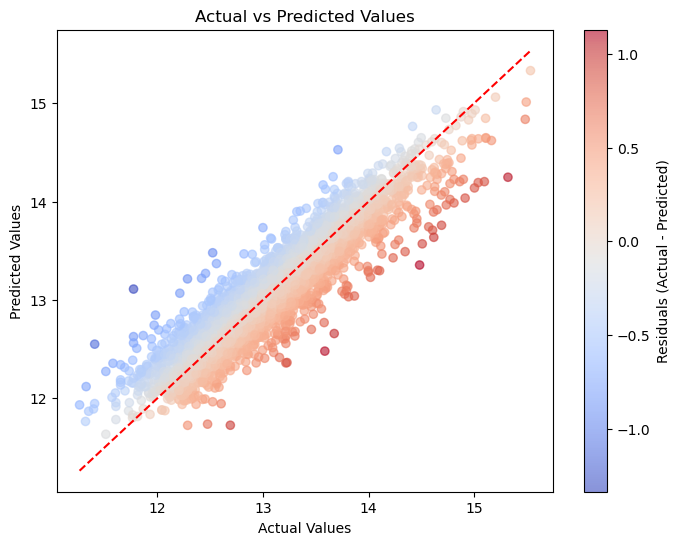

In [74]:
# Performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Performance Metrics:")
print(f"Mean Absolute Error (MSE): {mse:,.2f}")
print(f"Mean Squared Error (MSE): {mae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# Calculate residuals (errors)
residuals = y_test - y_pred

# Scatter Plot with Residual-Based 
plt.figure(figsize=(8, 6))

scatter = plt.scatter(y_test, y_pred, c=residuals, cmap='coolwarm', alpha=0.6)

# color bar to indicate the magnitude of residuals
plt.colorbar(scatter, label='Residuals (Actual - Predicted)')

# Ideal line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line (y = x)

# Titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

#### R-squared has 0.86, which means that the multi-linear regression explains 86% of the variance in the target variant.
#### This is a good result, suggesting that the model's predictions are close to the actual values.

In [77]:
# print some of the actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

          Actual  Predicted
735    12.807655  12.852059
2830   13.670486  13.735785
4106   13.852807  13.976535
16218  14.214287  14.181883
19964  13.474429  13.457115
